# LETS GROW MORE DATA SCIENCE INTERSHIP(VIP)

# Name: Ramesh Jagannath Devkar

# Title: Stock Market Prediction And Forecasting Using Stacked LSTM

# Level : Beginner

# Batch: September

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset
data = pd.read_csv('NSE-TATAGLOBAL.csv') 

In [4]:
# Analysis
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [5]:
data.shape

(2035, 8)

In [6]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [7]:
#basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
# to display descriptive stats about data
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
# checking null values
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

# Picking up Close Column

In [10]:
df = data.reset_index()['Close']
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [11]:
df.shape

(2035,)

Text(0, 0.5, 'Y-axis')

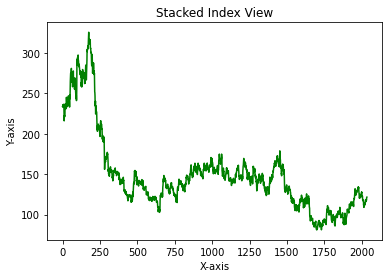

In [12]:
#Visualization
plt.plot(df, color = 'green')
plt.title("Stacked Index View")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler(feature_range = (0,1))
data1 = scaler.fit_transform(np.array(df).reshape(-1,1))

In [15]:
data1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [16]:
data.shape

(2035, 8)

In [17]:
#Train Test Split
train_size = int(len(data)*0.65)
test_size = len(data1) - train_size
train_data, test_data = data1[0:train_size,:],data1[train_size:len(data1),:1]

In [18]:
train_size,test_size

(1322, 713)

In [19]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [20]:
test_data

array([[0.24652778],
       [0.23611111],
       [0.25204248],
       [0.25919118],
       [0.25776144],
       [0.2681781 ],
       [0.25449346],
       [0.27103758],
       [0.24530229],
       [0.26756536],
       [0.27267157],
       [0.26633987],
       [0.27410131],
       [0.28615196],
       [0.27818627],
       [0.27205882],
       [0.27124183],
       [0.27798203],
       [0.27083333],
       [0.25857843],
       [0.24285131],
       [0.2250817 ],
       [0.23447712],
       [0.24346405],
       [0.23611111],
       [0.22937092],
       [0.21527778],
       [0.20976307],
       [0.20751634],
       [0.2060866 ],
       [0.20445261],
       [0.20098039],
       [0.21180556],
       [0.19301471],
       [0.18974673],
       [0.20302288],
       [0.21752451],
       [0.20629085],
       [0.19158497],
       [0.17381536],
       [0.17401961],
       [0.18361928],
       [0.17830882],
       [0.19362745],
       [0.20098039],
       [0.20486111],
       [0.21425654],
       [0.218

In [21]:
def create_data(dataset,time_step = 1):
    dataX, dataY = [],[]
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [22]:
time_step = 100
x_train, y_train = create_data(train_data,time_step)
x_test,y_test = create_data(test_data,time_step)

In [23]:
x_train

array([[0.62418301, 0.62214052, 0.62622549, ..., 0.83455882, 0.86213235,
        0.85273693],
       [0.62214052, 0.62622549, 0.63378268, ..., 0.86213235, 0.85273693,
        0.87111928],
       [0.62622549, 0.63378268, 0.62234477, ..., 0.85273693, 0.87111928,
        0.84497549],
       ...,
       [0.34517974, 0.31781046, 0.33047386, ..., 0.2816585 , 0.27001634,
        0.26531863],
       [0.31781046, 0.33047386, 0.32128268, ..., 0.27001634, 0.26531863,
        0.27389706],
       [0.33047386, 0.32128268, 0.34007353, ..., 0.26531863, 0.27389706,
        0.25347222]])

In [24]:
x_train.shape,y_train.shape

((1221, 100), (1221,))

In [25]:
x_test.shape,y_test.shape

((612, 100), (612,))

In [26]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [27]:
!pip install tensorflow

  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
20/20 [==============================] - 10s 198ms/step - loss: 0.0240 - val_loss: 0.0061
Epoch 2/100
20/20 [==============================] - 2s 113ms/step - loss: 0.0036 - val_loss: 9.8676e-04
Epoch 3/100
20/20 [==============================] - 2s 116ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 4/100
20/20 [==============================] - 3s 127ms/step - loss: 0.0016 - val_loss: 8.7575e-04
Epoch 5/100
20/20 [==============================] - 2s 116ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 2s 118ms/step - loss: 0.0015 - val_loss: 9.9710e-04
Epoch 7/100
20/20 [==============================] - 2s 117ms/step - loss: 0.0014 - val_loss: 8.1644e-04
Epoch 8/100
20/20 [==============================] - 2s 118ms/step - loss: 0.0014 - val_loss: 9.3726e-04
Epoch 9/100
20/20 [==============================] - 3s 133ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 10/100
20/20 [==============================] - 3s 127ms/step - 

20/20 [==============================] - 2s 116ms/step - loss: 3.2413e-04 - val_loss: 2.4875e-04
Epoch 77/100
20/20 [==============================] - 2s 126ms/step - loss: 3.0572e-04 - val_loss: 2.5253e-04
Epoch 78/100
20/20 [==============================] - 2s 116ms/step - loss: 2.9347e-04 - val_loss: 3.0357e-04
Epoch 79/100
20/20 [==============================] - 2s 115ms/step - loss: 3.1156e-04 - val_loss: 3.8502e-04
Epoch 80/100
20/20 [==============================] - 2s 115ms/step - loss: 3.3411e-04 - val_loss: 2.9472e-04
Epoch 81/100
20/20 [==============================] - 2s 114ms/step - loss: 2.7379e-04 - val_loss: 3.0696e-04
Epoch 82/100
20/20 [==============================] - 2s 115ms/step - loss: 2.7826e-04 - val_loss: 2.5195e-04
Epoch 83/100
20/20 [==============================] - 2s 115ms/step - loss: 2.9638e-04 - val_loss: 2.8447e-04
Epoch 84/100
20/20 [==============================] - 2s 114ms/step - loss: 2.8646e-04 - val_loss: 2.6831e-04
Epoch 85/100
20/20 [===

In [32]:
#Prediction
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

20/20 [==============================] - 0s 23ms/step


In [33]:
import math
from sklearn.metrics import mean_squared_error
#Calculate RMSE
math.sqrt(mean_squared_error(y_train,train_predict))

167.16690678926182

In [34]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

116.5958567143926

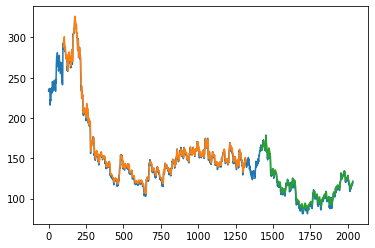

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [35]:
# Plotting
look_back = 100
# shift train prediction for plotting 
trainPredict = np.empty_like(data1)
trainPredict[:,:] = np.nan
trainPredict[look_back:len(train_predict)+look_back, :] = train_predict

# shift test prediction
testPredict = np.empty_like(data1)
testPredict[:,:] = np.nan
testPredict[len(train_predict) + (look_back * 2)+1:len(data1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")